In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
hiv_counts=pd.read_csv("https://data.pa.gov/api/views/buk2-94cb/rows.csv?accessType=DOWNLOAD")

In [108]:
hiv_counts.columns=hiv_counts.columns.str.strip().str.lower().str.replace(" ","_")
hiv_counts.columns=hiv_counts.columns.str.replace("/","_")

In [109]:
hiv_counts

,county_name,county_code_number,state_fips_code,county_fips_code,county_code,latitude_longitude,new_diagnoses_hiv_disease_count,new_diagnoses_hiv_disease_description,prevalence_hiv_disease_count,prevalence_hiv_disease_description,new_diagnoses_hiv_disease_among_idu_count,new_diagnoses_hiv_disease_among_idu_description,prevalence_hiv_disease_among_idu_count,prevalence_hiv_disease_among_idu_description,year
0,Adams,1,42,1,1,"(39.8720956503, -77.2222427076)",5.0,Individuals with New Diagnoses HIV Disease,71.0,Individuals with Prevalence HIV Disease,NaN,Non Report. Suppressed count for New Diagnoses...,15.0,Individuals with Prevalence HIV Disease Among...,2012
1,Adams,1,42,1,1,"(39.8720956503, -77.2222427076)",NaN,Non Report. Suppressed count for Individuals N...,72.0,Individuals with Prevalence HIV Disease,NaN,Non Report. Suppressed count for New Diagnoses...,15.0,Individuals with Prevalence HIV Disease Among IDU,2013
2,Adams,1,42,1,1,"(39.8720956503, -77.2222427076)",5.0,Individuals with New Diagnoses HIV Disease,75.0,Individuals with Prevalence HIV Disease,NaN,Non Report. Suppressed count for New Diagnoses...,15.0,Individuals with Prevalence HIV Disease Among...,2014
3,Adams,1,42,1,1,"(39.8720956503, -77.2222427076)",NaN,Non Report. Suppressed count for Individuals N...,76.0,Individuals with Prevalence HIV Disease,NaN,Non Report. Suppressed count for New Diagnoses...,15.0,Individuals with Prevalence HIV Disease Among...,2015
4,Adams,1,42,1,1,"(39.8720956503, -77.2222427076)",7.0,Individuals with New Diagnoses HIV Disease,83.0,Individuals with Prevalence HIV Disease,NaN,Non Report. Suppressed count for New Diagnoses...,15.0,Individuals with Prevalence HIV Disease Among...,2016
5,Allegheny,2,42,3,2,"(40.4673554298, -79.9861984282)",128.0,Individuals with New Diagnoses HIV Disease,2709.0,Individuals with Prevalence HIV Disease,NaN,Non Report. Suppressed count for New Diagnoses...,328.0,Individuals with Prevalence HIV Disease Among...,2014
6,Allegheny,2,42,3,2,"(40.4673554298, -79.9861984282)",127.0,Individuals with New Diagnoses HIV Disease,2910.0,Individuals with Prevalence HIV Disease,5.0,Individuals with New Diagnoses HIV Disease amo...,328.0,Individuals with Prevalence HIV Disease Among IDU,2016
7,Allegheny,2,42,3,2,"(40.4673554298, -79.9861984282)",142.0,Individuals with New Diagnoses HIV Disease,2817.0,Individuals with Prevalence HIV Disease,10.0,Individuals with New Diagnoses HIV Disease amo...,331.0,Individuals with Prevalence HIV Disease Among...,2015
8,Allegheny,2,42,3,2,"(40.4673554298, -79.9861984282)",123.0,Individuals with New Diagnoses HIV Disease,2546.0,Individuals with Prevalence HIV Disease,NaN,Non Report. Suppressed count for New Diagnoses...,332.0,Individuals with Prevalence HIV Disease Among...,2012
9,Allegheny,2,42,3,2,"(40.4673554298, -79.9861984282)",119.0,Individuals with New Diagnoses HIV Disease,2622.0,Individuals with Prevalence HIV Disease,8.0,Individuals with New Diagnoses HIV Disease amo...,333.0,Individuals with Prevalence HIV Disease Among IDU,2013


# Columns of interest: New Diagnoses, prevalance of HIV, new diagnoses among injection drug users risk factor, prevalence HIV among injection drug users risk fact and year.

In [110]:
hiv1=hiv_counts[['county_name','year','prevalence_hiv_disease_count','new_diagnoses_hiv_disease_count','new_diagnoses_hiv_disease_among_idu_count','prevalence_hiv_disease_among_idu_count']]

In [111]:
hiv1.columns=hiv1.columns.str.replace('hiv_disease_',"")

In [112]:
hiv1.head()

,county_name,year,prevalence_count,new_diagnoses_count,new_diagnoses_among_idu_count,prevalence_among_idu_count
0,Adams,2012,71.0,5.0,NaN,15.0
1,Adams,2013,72.0,NaN,NaN,15.0
2,Adams,2014,75.0,5.0,NaN,15.0
3,Adams,2015,76.0,NaN,NaN,15.0
4,Adams,2016,83.0,7.0,NaN,15.0


# Now we bring in a map.

In [113]:
county_map=gpd.read_file('C:\\Users\\ulleryc\\data-newsroom\\mapping_data\\tl_2010_42_county10\\tl_2010_42_county10.shp')

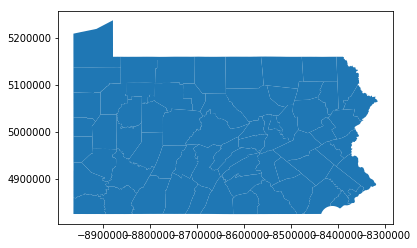

In [114]:
county_map.plot()

In [115]:
county_map.columns=county_map.columns.str.lower().str.strip().str.replace(" ","_")

In [116]:
county_map.rename(columns={'name10':"county_name"},inplace=True)
cmap1=county_map[['county_name','geometry']]

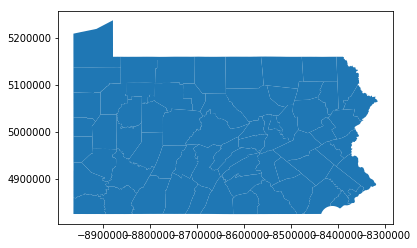

In [117]:
cmap1.plot()

In [118]:
cmap1.head()

,county_name,geometry
0,Cambria,"POLYGON ((-8798015.1732 4912041.040899999, -87..."
1,Allegheny,"POLYGON ((-8909243.9386 4907860.158500001, -89..."
2,Adams,"POLYGON ((-8623471.1097 4845584.443700001, -86..."
3,Huntingdon,POLYGON ((-8699643.920299999 4891351.579999998...
4,Crawford,POLYGON ((-8879068.786800001 5138660.476400003...


In [119]:
cmap1['county_name']=cmap1.county_name.str.lower()
hiv1['county_name']=hiv1.county_name.str.lower()

c:\users\ulleryc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\ulleryc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
maybe1=pd.merge(cmap1,hiv1,on='county_name',how='outer')

In [121]:
maybe1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 7 columns):
county_name                      335 non-null object
geometry                         335 non-null object
year                             335 non-null int64
prevalence_count                 325 non-null float64
new_diagnoses_count              135 non-null float64
new_diagnoses_among_idu_count    21 non-null float64
prevalence_among_idu_count       261 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 20.9+ KB


In [122]:
maybe1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 7 columns):
county_name                      335 non-null object
geometry                         335 non-null object
year                             335 non-null int64
prevalence_count                 325 non-null float64
new_diagnoses_count              135 non-null float64
new_diagnoses_among_idu_count    21 non-null float64
prevalence_among_idu_count       261 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 20.9+ KB


In [123]:
for col in ['prevalence_count','new_diagnoses_count','new_diagnoses_among_idu_count','prevalence_among_idu_count']:
    maybe1[col]=maybe1[col].fillna(0)

In [124]:
maybe1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 7 columns):
county_name                      335 non-null object
geometry                         335 non-null object
year                             335 non-null int64
prevalence_count                 335 non-null float64
new_diagnoses_count              335 non-null float64
new_diagnoses_among_idu_count    335 non-null float64
prevalence_among_idu_count       335 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 20.9+ KB


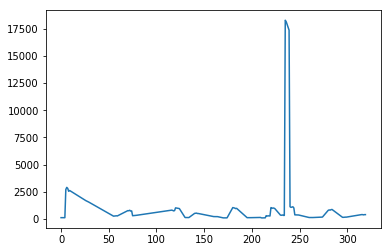

In [125]:
maybe1[maybe1.prevalence_count>100].prevalence_count.plot()

In [126]:
hiv1.year.value_counts()

2016    67
2015    67
2014    67
2013    67
2012    67
Name: year, dtype: int64

In [85]:
maybe1.to_file('C://Users//ulleryc//data-newsroom//weekend_challenge//weekend_data_files//hiv_prevalence_injection_use.rar')

In [127]:
maybe1.prevalence_among_idu_count.describe()

count     335.000000
mean      126.146269
std       573.851234
min         0.000000
25%         5.000000
50%        17.000000
75%        67.500000
max      4905.000000
Name: prevalence_among_idu_count, dtype: float64

In [128]:
maybe1.head()

,county_name,geometry,year,prevalence_count,new_diagnoses_count,new_diagnoses_among_idu_count,prevalence_among_idu_count
0,cambria,"POLYGON ((-8798015.1732 4912041.040899999, -87...",2016,128.0,0.0,0.0,32.0
1,cambria,"POLYGON ((-8798015.1732 4912041.040899999, -87...",2015,125.0,5.0,0.0,33.0
2,cambria,"POLYGON ((-8798015.1732 4912041.040899999, -87...",2012,119.0,10.0,0.0,34.0
3,cambria,"POLYGON ((-8798015.1732 4912041.040899999, -87...",2013,122.0,0.0,0.0,34.0
4,cambria,"POLYGON ((-8798015.1732 4912041.040899999, -87...",2014,125.0,6.0,0.0,34.0


year
2012    8704.0
2013    8580.0
2014    8427.0
2015    8319.0
2016    8229.0
Name: prevalence_among_idu_count, dtype: float64


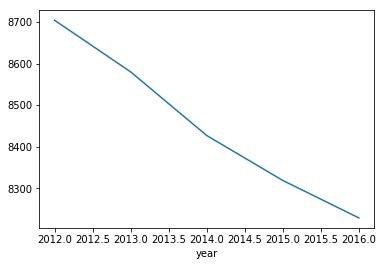

In [129]:
print(maybe1.groupby('year').prevalence_among_idu_count.sum())
maybe1.groupby('year').prevalence_among_idu_count.sum().plot.line()

year
2012    118.0
2013     82.0
2014     61.0
2015     49.0
2016     40.0
Name: new_diagnoses_among_idu_count, dtype: float64


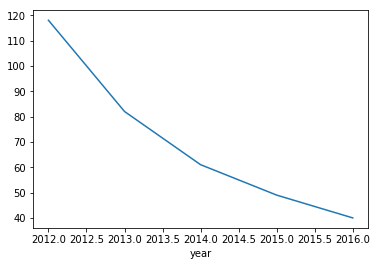

In [130]:
print(maybe1.groupby('year').new_diagnoses_among_idu_count.sum())
maybe1.groupby('year').new_diagnoses_among_idu_count.sum().plot.line()

In [131]:
bucks=maybe1[maybe1.county_name=='bucks']

year
2012    129.0
2013    131.0
2014    128.0
2015    126.0
2016    126.0
Name: prevalence_among_idu_count, dtype: float64


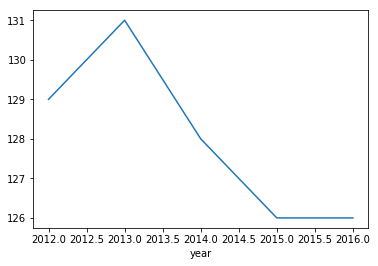

In [132]:
print(bucks.groupby('year').prevalence_among_idu_count.sum())
bucks.groupby('year').prevalence_among_idu_count.sum().plot.line()

year
2012    6.0
2013    5.0
2014    0.0
2015    0.0
2016    0.0
Name: new_diagnoses_among_idu_count, dtype: float64


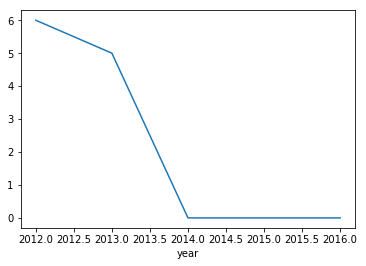

In [133]:
print(bucks.groupby('year').new_diagnoses_among_idu_count.sum())
bucks.groupby('year').new_diagnoses_among_idu_count.sum().plot.line()

year
2012    748.0
2013    776.0
2014    793.0
2015    808.0
2016    819.0
Name: prevalence_count, dtype: float64


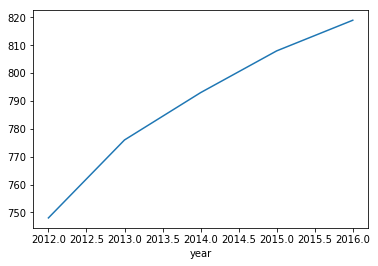

In [134]:
print(bucks.groupby('year').prevalence_count.sum())
bucks.groupby('year').prevalence_count.sum().plot.line()

year
2012    43.0
2013    37.0
2014    30.0
2015    24.0
2016    19.0
Name: new_diagnoses_count, dtype: float64


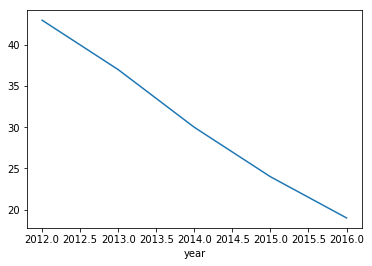

In [135]:
print(bucks.groupby('year').new_diagnoses_count.sum())
bucks.groupby('year').new_diagnoses_count.sum().plot.line()

In [159]:
maybe1.prevalence_among_idu_count.describe()

count     335.000000
mean      126.146269
std       573.851234
min         0.000000
25%         5.000000
50%        17.000000
75%        67.500000
max      4905.000000
Name: prevalence_among_idu_count, dtype: float64

In [137]:
maybe1.prevalence_count.median()

75.0

In [140]:
271/2

135.5

In [156]:
print(maybe1[maybe1.year==2012].prevalence_count.describe())
print(maybe1[maybe1.year==2013].prevalence_count.describe())
print(maybe1[maybe1.year==2014].prevalence_count.describe())
print(maybe1[maybe1.year==2015].prevalence_count.describe())
print(maybe1[maybe1.year==2016].prevalence_count.describe())

count       67.000000
mean       492.119403
std       2133.339291
min          0.000000
25%         21.500000
50%         74.000000
75%        244.000000
max      17348.000000
Name: prevalence_count, dtype: float64
count       67.000000
mean       502.597015
std       2168.832636
min          0.000000
25%         21.500000
50%         72.000000
75%        251.000000
max      17630.000000
Name: prevalence_count, dtype: float64
count       67.000000
mean       511.507463
std       2198.281067
min          0.000000
25%         21.000000
50%         75.000000
75%        252.500000
max      17861.000000
Name: prevalence_count, dtype: float64
count       67.000000
mean       521.208955
std       2231.159907
min          0.000000
25%         22.500000
50%         78.000000
75%        257.000000
max      18118.000000
Name: prevalence_count, dtype: float64
count       67.000000
mean       529.567164
std       2250.006365
min          0.000000
25%         22.500000
50%         82.000000
75%     

In [151]:
maybe1[maybe1.prevalence_count>1000].shape

(28, 7)

In [162]:
maybe1.new_diagnoses_among_idu_count.describe()

count    335.000000
mean       1.044776
std        6.755864
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       92.000000
Name: new_diagnoses_among_idu_count, dtype: float64

In [169]:
maybe1.groupby('year').new_diagnoses_among_idu_count.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2012,67.0,1.761194,11.300428,0.0,0.0,0.0,0.0,92.0
2013,67.0,1.223881,6.395597,0.0,0.0,0.0,0.0,51.0
2014,67.0,0.910448,5.688189,0.0,0.0,0.0,0.0,46.0
2015,67.0,0.731343,4.062325,0.0,0.0,0.0,0.0,31.0
2016,67.0,0.597015,3.555021,0.0,0.0,0.0,0.0,28.0


In [178]:
test1=maybe1[maybe1.new_diagnoses_count>1]

In [179]:
test1.new_diagnoses_count.describe()

count    135.000000
mean      43.837037
std      109.321190
min        5.000000
25%        7.000000
50%       13.000000
75%       34.000000
max      735.000000
Name: new_diagnoses_count, dtype: float64

In [182]:
maybe1.groupby('county_name').new_diagnoses_count.sum().describe()

count      67.000000
mean       88.328358
std       357.073008
min         0.000000
25%         0.000000
50%         7.000000
75%        40.000000
max      2851.000000
Name: new_diagnoses_count, dtype: float64

In [190]:
test2=maybe1[maybe1.new_diagnoses_count>1]
test2.groupby('year').new_diagnoses_count.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2012,29.0,48.586207,134.812440,5.0,7.00,11.0,40.00,735.0
2013,24.0,53.458333,127.141133,6.0,11.25,18.0,34.75,637.0
2014,30.0,39.066667,102.255573,5.0,5.25,9.0,29.50,563.0
2015,27.0,41.185185,102.421842,5.0,7.00,11.0,28.50,534.0
2016,25.0,37.680000,76.404472,5.0,7.00,13.0,31.00,382.0


In [195]:
t1=bucks.groupby('year').prevalence_count.sum()

In [197]:
t2=pd.DataFrame(t1)
t2.rename(columns={'year':'county'},inplace=True)
t3=t2.reset_index()
t3.T

,0,1,2,3,4
year,2012.0,2013.0,2014.0,2015.0,2016.0
prevalence_count,748.0,776.0,793.0,808.0,819.0


In [199]:
t4=t3.T

In [205]:
t4.columns=t4.iloc[0]
t4.reindex(t4.index.drop('year'))
t4

year,2012.0,2013.0,2014.0,2015.0,2016.0
year,2012.0,2013.0,2014.0,2015.0,2016.0
prevalence_count,748.0,776.0,793.0,808.0,819.0
